In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr

In [2]:
# MATCH BODY MOTION ENERGY TO NEURAL ACTIVITY FOR EACH CELL AND FRAME SESSION-WISE
# Import down-sampled motion energy
motion = pd.read_csv(r'/Volumes/Behaviour/Bodyvectors_05_2000/body_motion_energy_05_2000.csv', index_col=0)
pearsons = pd.read_csv(r'/Volumes/Behaviour/Bodyvectors_05_2000/pearsons_long_05_2000.csv', index_col=0)
#input_path = r'I:\Data to test Aras 2P code\Tailored 3sec 2P Trials' # dF_F0 traces cropped to 1.5 sec pre- and post-stimulus
input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/trial-wise motion correlation'

sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)


48

In [179]:
pearson_ave = pd.DataFrame()
pearson_trial = pd.DataFrame()
session_names = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    print('cells shape', cells.shape)
    cell_list = (list(cells.columns)) # list of rois 
    cell_list = cell_list[:-1] # last column is the identifier, hence I remove it
    session_mo = motion[motion['identifier'].str.contains(str(ses_name))] # subsetting body motion energy file to the session being processed
    print('session_mo shape', session_mo.shape)# subsetting body motion energy file to the session being processed
    session_mo['ids']  = session_mo.apply(lambda x: x['identifier'] +'_'+str(x['frame']), axis=1) # creating a new identifier column which combines trial ID and frame number
    # now I have to create a matching frames_for_each_trial column for the 2P recording dataframe
    frames_template = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) # template with the number of frames per trial
    factor = int(cells.shape[0]/19) # finding out how many trials per session there are (this is not always identical to the motion energy file, due to the likelyhood threshold)
    cells['frame'] = np.tile(frames_template, factor) # distritbute 'frames_template' across the whole 2P recording
    cells['ids'] = cells.apply(lambda x: x['identifier'] +'_'+str(x['frame']), axis=1) # create new identifier column as in line 34
    temp = pd.merge(cells, session_mo, on="ids") # creating a temporary data frame by merging motion energy vectors and 2P traces aligned on 'ids' column  
    temp = temp.dropna()   # then dropping those frames that don't have motion energy values due to likelihood threshold       
    
    temp1 = temp.drop(['identifier_x', 'frame_x', 'ids', 'frame_y'], axis=1)
    ids = list(temp1['identifier_y'].unique())
    trial_aves = pd.DataFrame()
    cell_corr = pd.DataFrame()
    print('number of trials: ', len(ids))

    for i, idx in enumerate(ids):
        trial = temp1.loc[temp['identifier_y']==idx]
        #print('number of trials: ', len(ids))
    
        li_1 = []
        for c, cell in enumerate(cell_list):
            P,_ = pearsonr(trial[cell],trial['motion_e'])
            li.append((cell, P, idx))
    
        corr_1 = pd.DataFrame(li_1, columns=('cell_id', 'pearsons', 'trial_id'))
        trial_ave = trial.iloc[:,:-1].apply(lambda x: x.mean())
        trial_aves[idx]=trial_ave
        pearson_trial = pd.concat([pearson_trial, corr_1], axis = 0)
    
    trial_aves.to_csv(os.path.join(output_path, ses_name+'_cell-wise average activity.csv'))
    
    li_2=[]
    for c, cell in enumerate(cell_list):
            P,_ = pearsonr(trial_aves.loc[cell],trial_aves.loc['motion_e'])
            li_2.append((cell, P))
    
    corr_2 = pd.DataFrame(li_2, columns=('cell_id', 'pearsons'))
    pearson_ave = pd.concat([pearson_ave, corr_2], axis = 0)

pearson_trial.to_csv(os.path.join(output_path,'cell-motion correlation on single trials.csv'))
pearson_ave.to_csv(os.path.join(output_path,'cell-motion correlation on trial ave.csv'))

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01
cells shape (456, 359)
session_mo shape (361, 3)


/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


number of trials:  19
processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02
cells shape (437, 374)
session_mo shape (437, 3)
number of trials:  23
processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03
cells shape (418, 284)
session_mo shape (418, 3)
number of trials:  22
processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04
cells shape (456, 331)
session_mo shape (456, 3)
number of trials:  24
processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04
cells shape (494, 365)
session_mo shape (456, 3)
number of trials:  24
processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05
cells shape (456, 213)
session_mo shape (456, 3)
number of trials:  24
processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06
cells shape (456, 320)
session_mo shape (456, 3)
number of trials:  24
processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06
cells shape (456, 348)
session_mo shape (399, 3)
number of trials:  21
processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07
cells shape (418, 377)
session_mo shape (418, 3)
number of trials:  22
pr

In [176]:
print(len(pearson_ave), len(pearsons))

19547 19547


2P06_Ses01
2P06_Ses02
2P06_Ses03
2P05_Ses04
2P06_Ses04
2P06_Ses05
2P05_Ses06
2P06_Ses06
2P05_Ses07
2P06_Ses07
2P07_Ses01
2P08_Ses01
2P07_Ses03
2P08_Ses02
2P07_Ses04
2P08_Ses03
2P07_Ses05
2P08_Ses04
2P07_Ses06
2P08_Ses05
2P07_Ses07


/Users/aspra/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2P08_Ses06
2P07_CFA
2P09_Ses01
2P08_CFA
2P11_Ses01
2P10_Ses01
2P09_Ses02
2P10_Ses02
2P09_Ses04
2P11_Ses04
2P11_Ses05
2P10_CFA
2P09_CFA
2P11_Ses02
2P09_Ses03
2P10_Ses03
2P10_Ses04
2P09_Ses05
2P10_Ses05
2P11_Ses06
2P11_CFA
2P05_Ses03


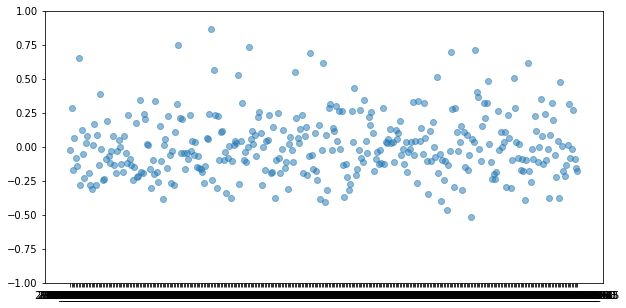

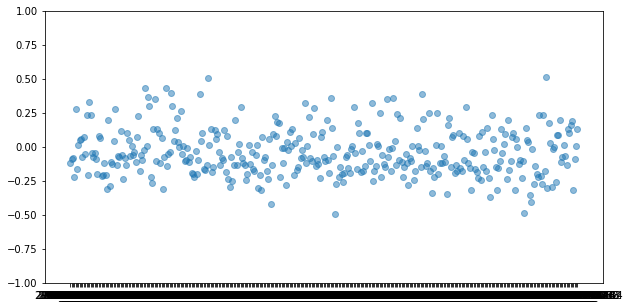

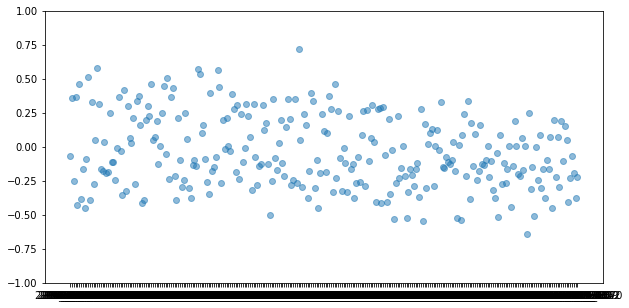

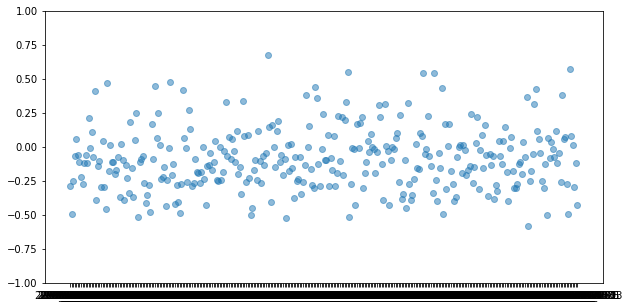

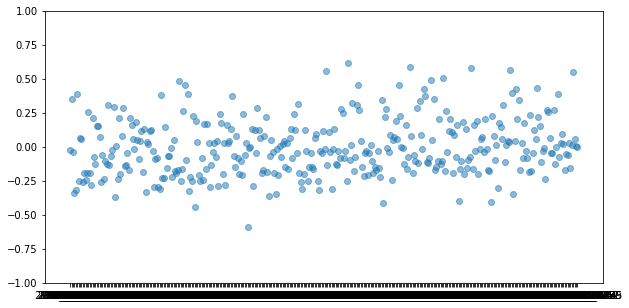

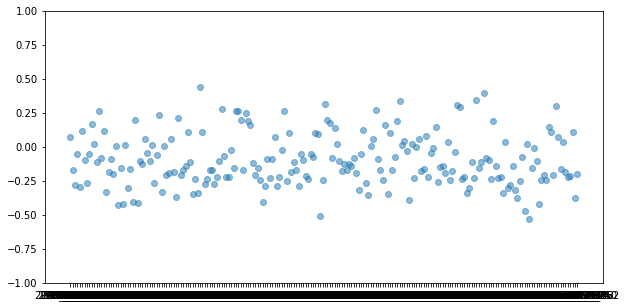

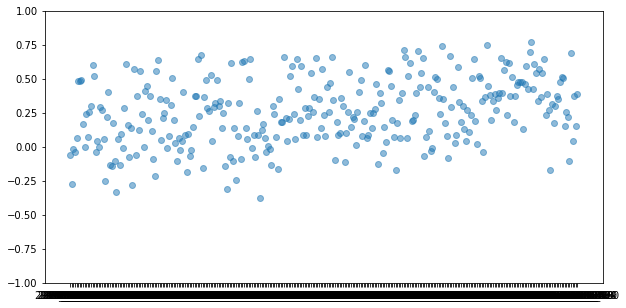

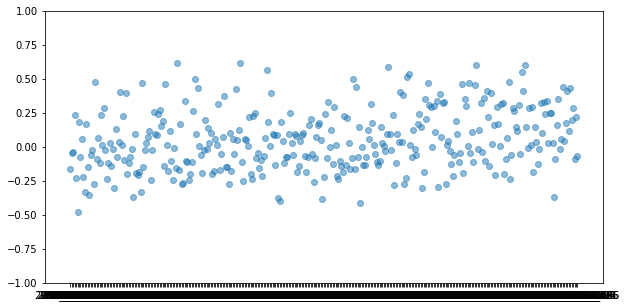

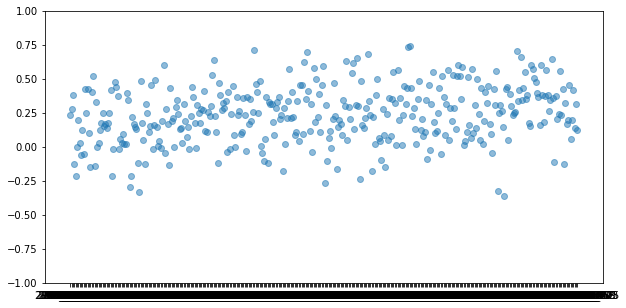

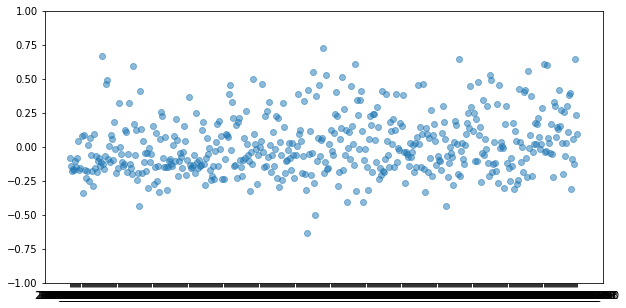

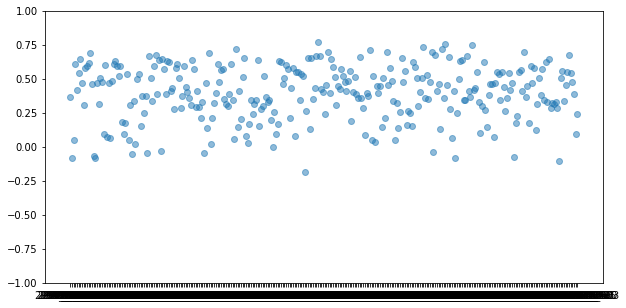

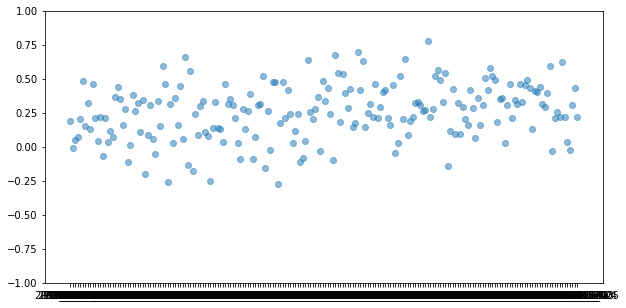

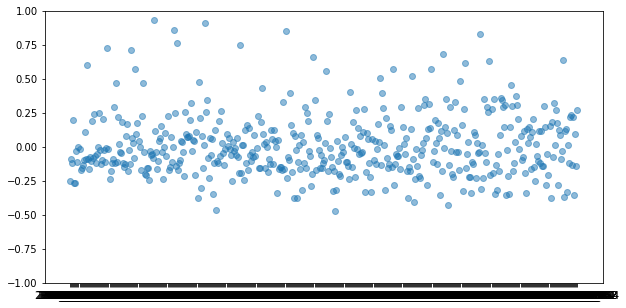

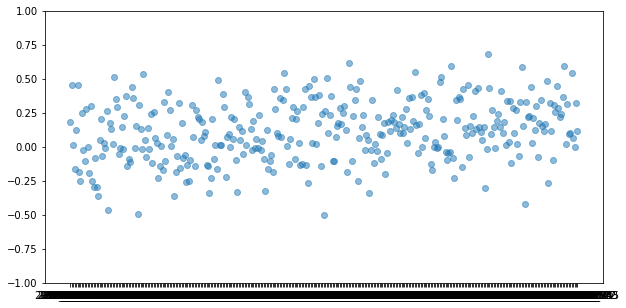

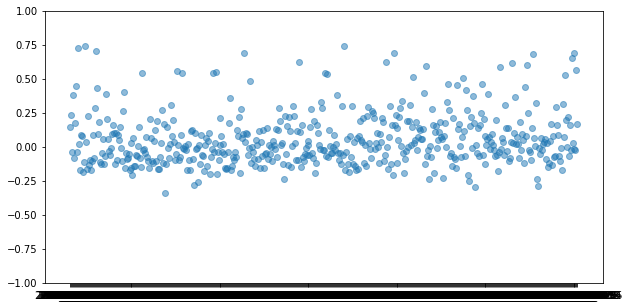

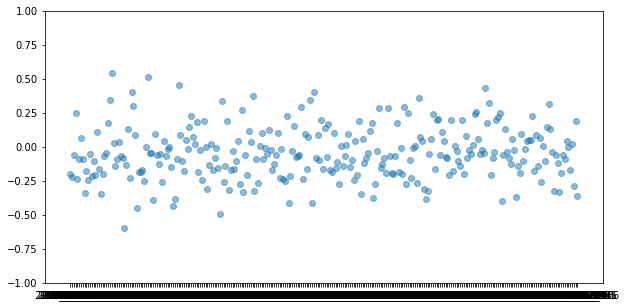

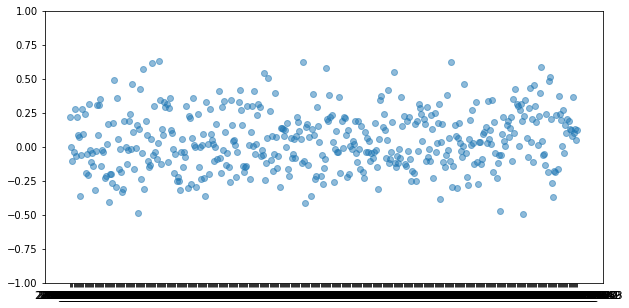

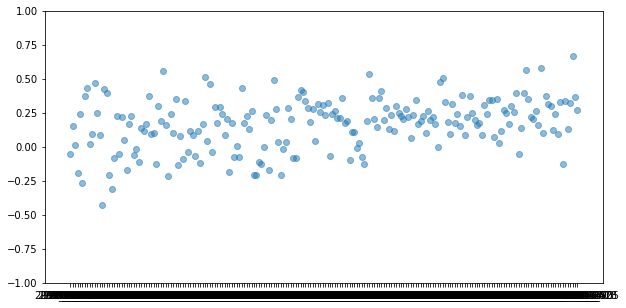

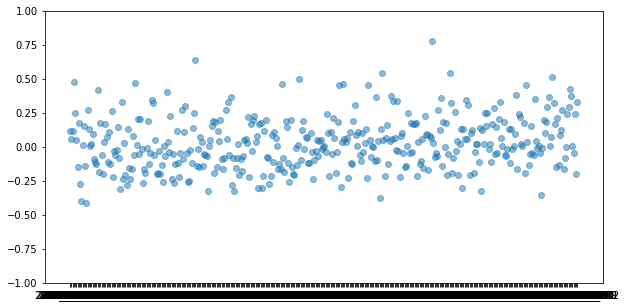

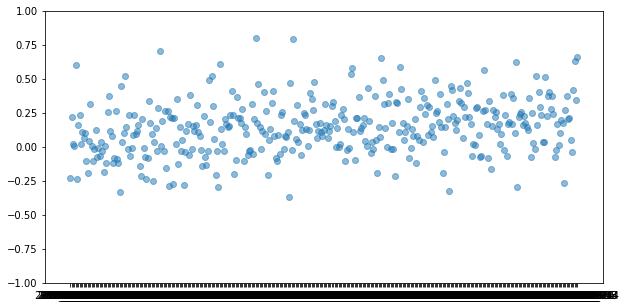

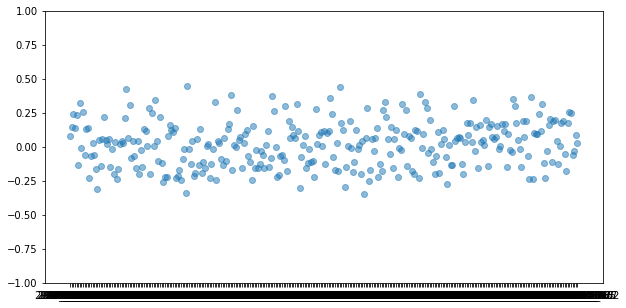

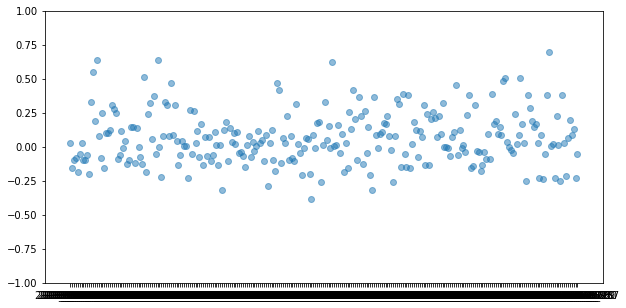

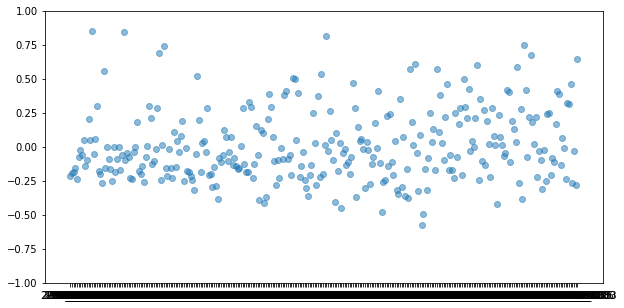

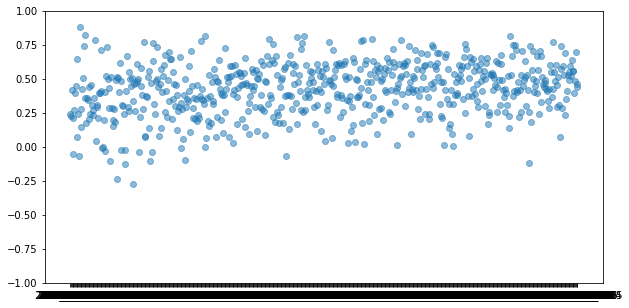

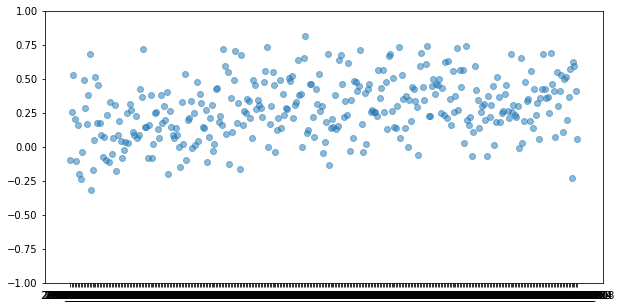

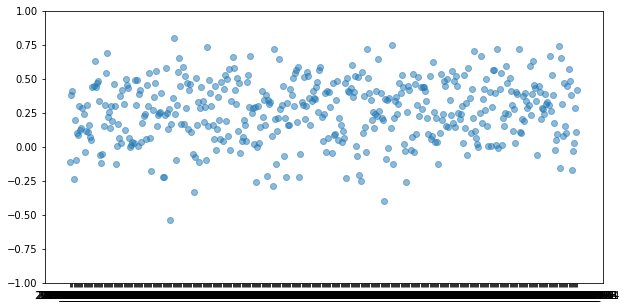

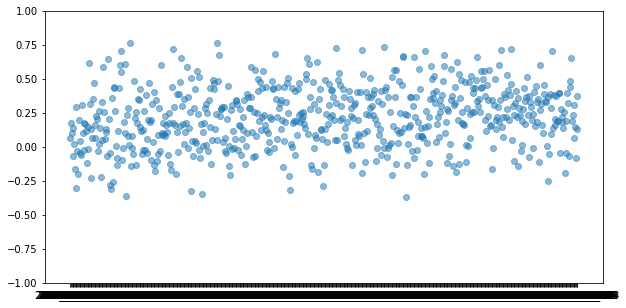

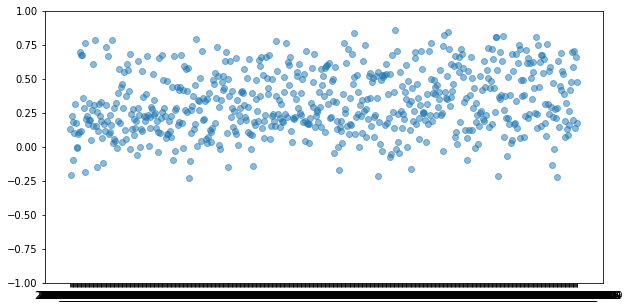

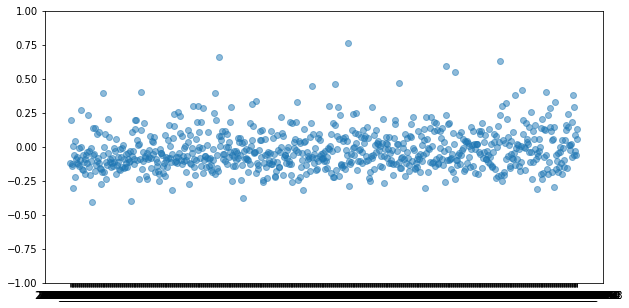

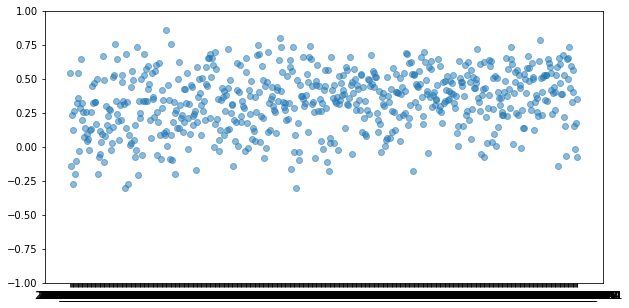

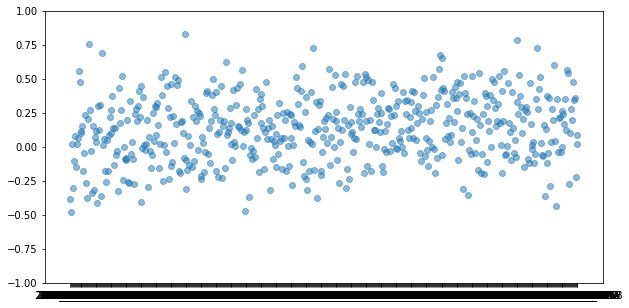

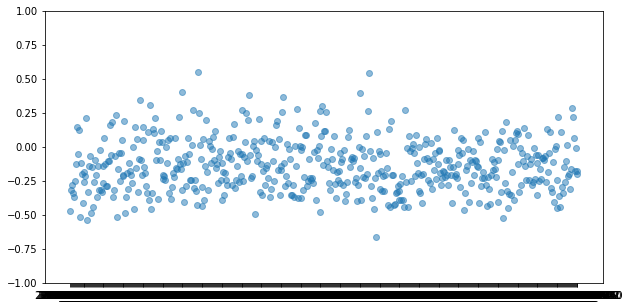

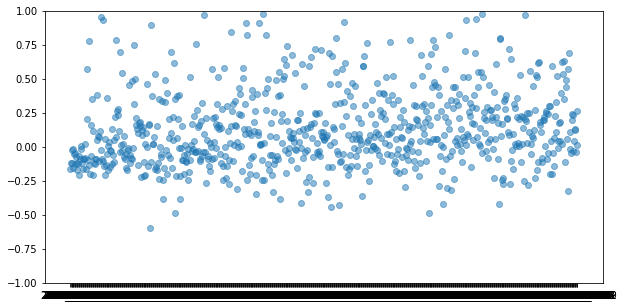

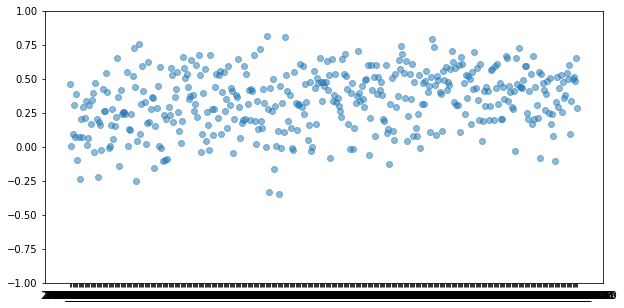

Error in callback <function flush_figures at 0x10e96d268> (for post_execute):


KeyboardInterrupt: 

In [180]:
# To make plots off the long-format data-frame
output_path = '/Volumes/Behaviour/Tailored 3sec 2P Trials/Motion Correlation Plots'

for s in session_names:
    print(s)
    df = pearson_ave[pearson_ave['cell_id'].str.contains(str(s))]
    plt.figure(figsize=(10,5))
    plt.scatter(x=df['cell_id'], y=df['pearsons'], alpha = 0.5)
    plt.ylim((-1,1))
    #plt.show()
    plt.savefig(os.path.join(output_path, s+'_motion_correlation_05_trial_ave.png'))

2P06_Ses01


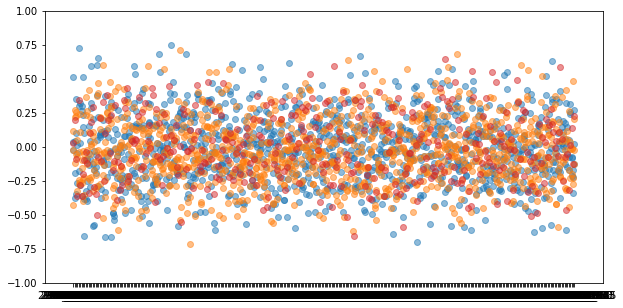

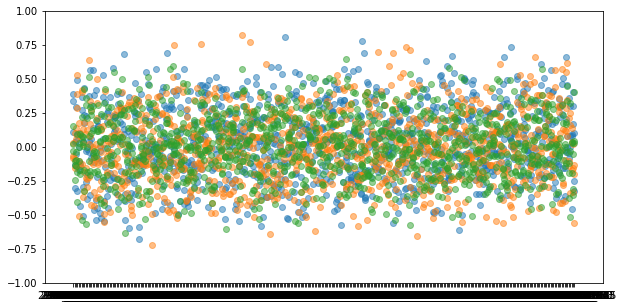

In [163]:
# To make plots off the long-format data-frame grouped by modality
stimuli = 'warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim'


print(session)
df = pearson_ave[pearson_ave['trial_id'].str.contains(str(session))]
df_warm = df[df['trial_id'].str.contains(str('warm'))]
df_hot= df[df['trial_id'].str.contains(str('hot'))]
df_opto = df[df['trial_id'].str.contains(str('opto'))]
df_off = df[df['trial_id'].str.contains(str('off-target'))]
plt.figure(figsize=(10,5))
plt.scatter(x=df_warm['cell_id'], y=df_warm['pearsons'], alpha = 0.5)
plt.scatter(x=df_hot['cell_id'], y=df_hot['pearsons'], alpha = 0.5)
plt.scatter(x=df_opto['cell_id'], y=df_opto['pearsons'], alpha = 0.5)
plt.scatter(x=df_off['cell_id'], y=df_off['pearsons'], alpha = 0.5)
plt.ylim((-1,1))
plt.show()
#plt.savefig(os.path.join(output_path, s+'_motion_correlation_trial_ave.png'))

df_vf = df[df['trial_id'].str.contains(str('von frey'))]
df_pp= df[df['trial_id'].str.contains(str('pin-prick'))]
df_app = df[df['trial_id'].str.contains(str('approach'))]
df_nos = df[df['trial_id'].str.contains(str('no stimulation'))]
plt.figure(figsize=(10,5))
plt.scatter(x=df_vf['cell_id'], y=df_vf['pearsons'], alpha = 0.5)
plt.scatter(x=df_pp['cell_id'], y=df_pp['pearsons'], alpha = 0.5)
plt.scatter(x=df_app['cell_id'], y=df_app['pearsons'], alpha = 0.5)
plt.scatter(x=df_nos['cell_id'], y=df_nos['pearsons'], alpha = 0.5)
plt.ylim((-1,1))
plt.show()

In [161]:
session

'2P06_Ses01'

2P06_Ses01


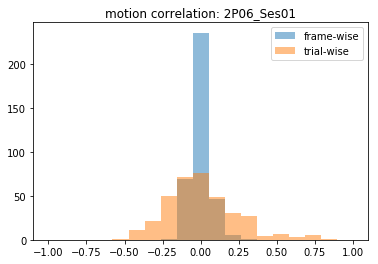

2P06_Ses02


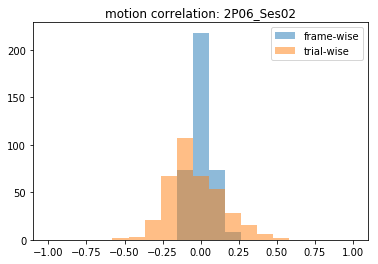

2P06_Ses03


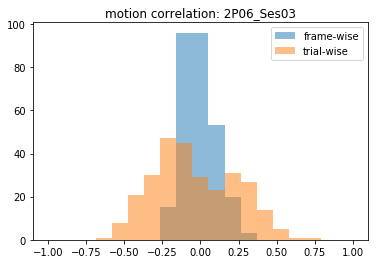

2P05_Ses04


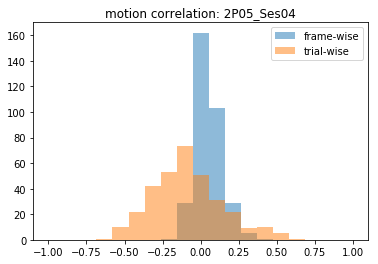

2P06_Ses04


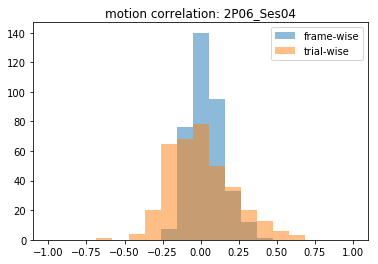

2P06_Ses05


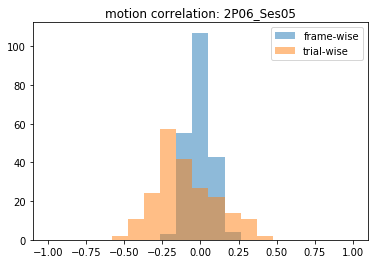

2P05_Ses06


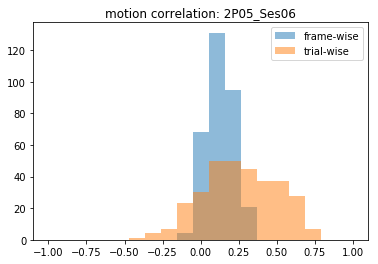

2P06_Ses06


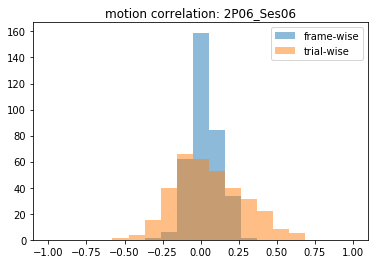

2P05_Ses07


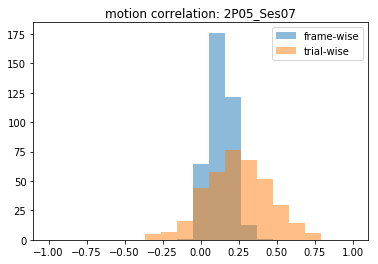

2P06_Ses07


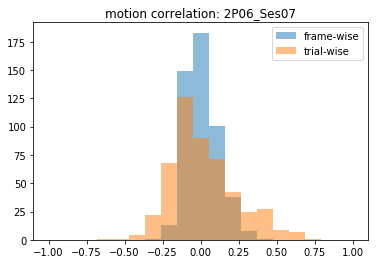

2P07_Ses01


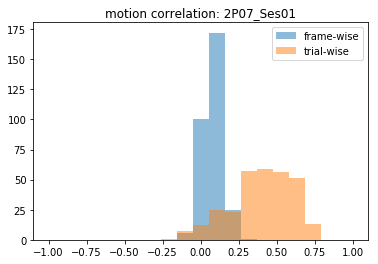

2P08_Ses01


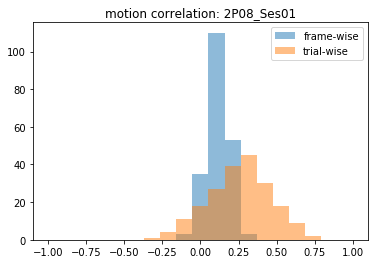

2P07_Ses03


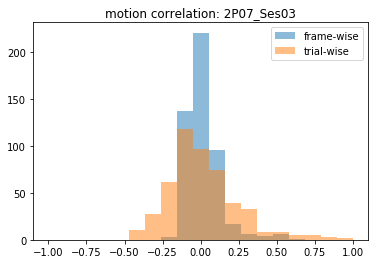

2P08_Ses02


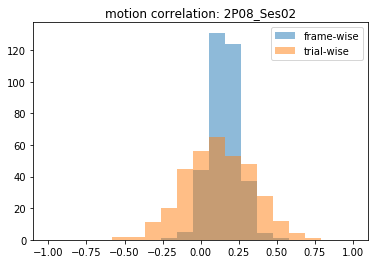

2P07_Ses04


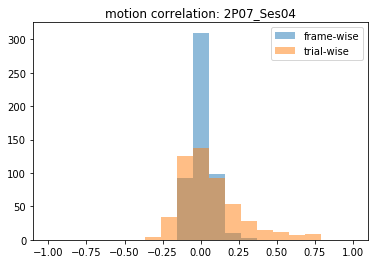

2P08_Ses03


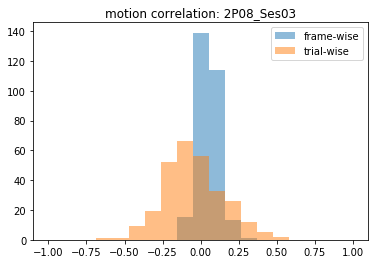

2P07_Ses05


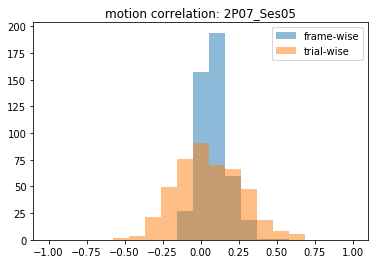

2P08_Ses04


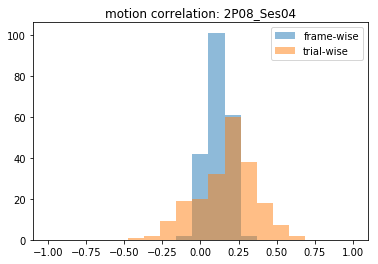

2P07_Ses06


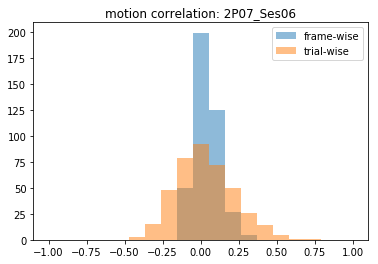

2P08_Ses05


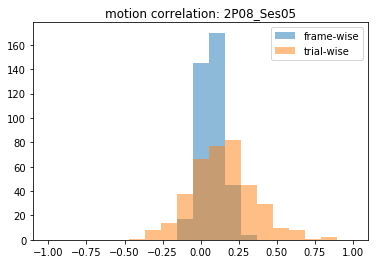

2P07_Ses07


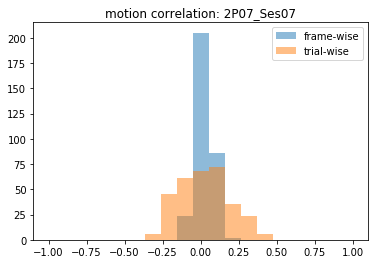

2P08_Ses06


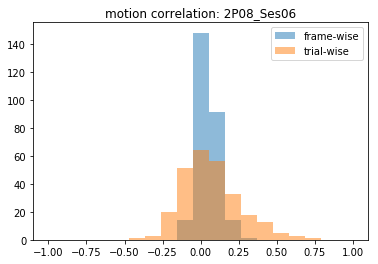

2P07_CFA


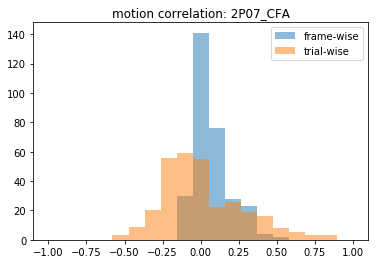

2P09_Ses01


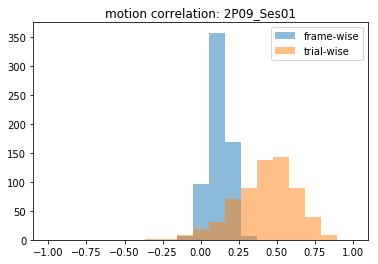

2P08_CFA


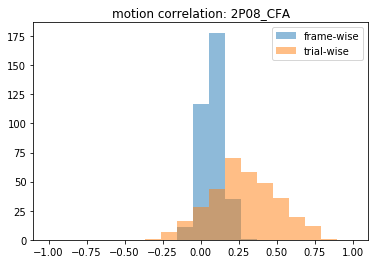

2P11_Ses01


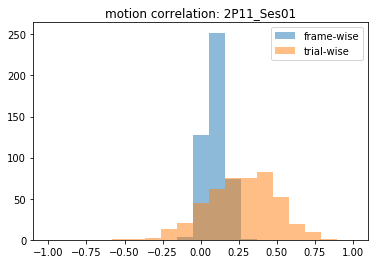

2P10_Ses01


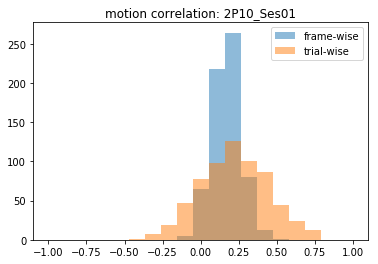

2P09_Ses02


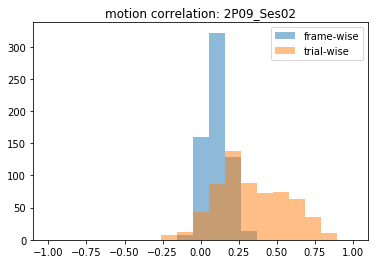

2P10_Ses02


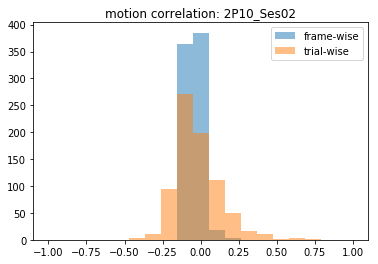

2P09_Ses04


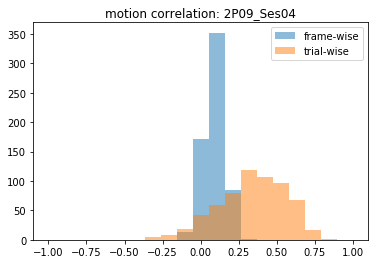

2P11_Ses04


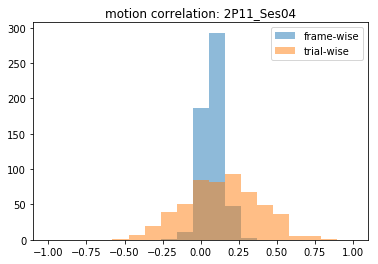

2P11_Ses05


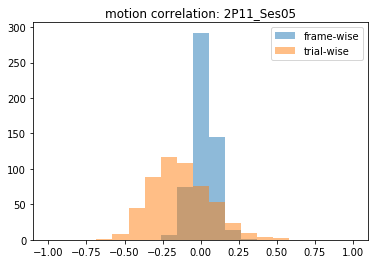

2P10_CFA


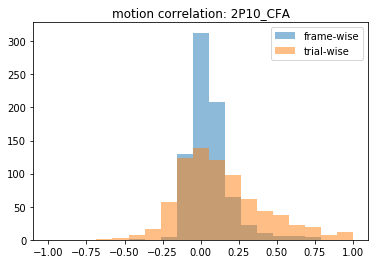

2P09_CFA


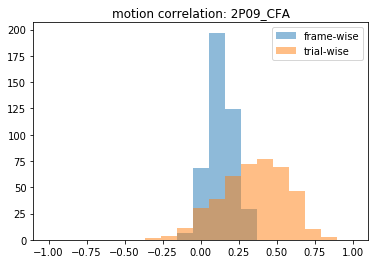

2P11_Ses02


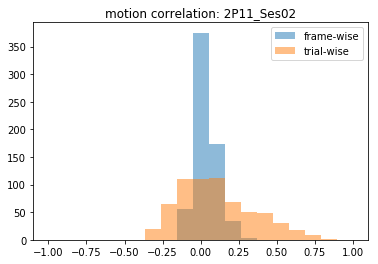

2P09_Ses03


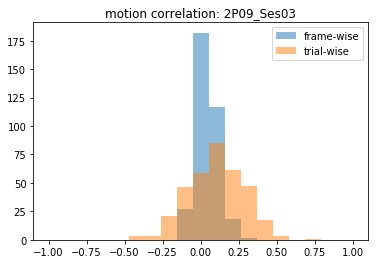

2P10_Ses03


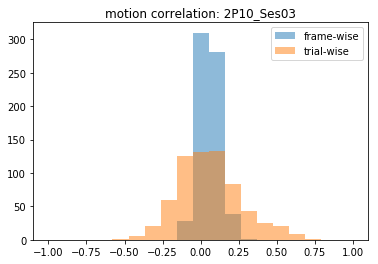

2P10_Ses04


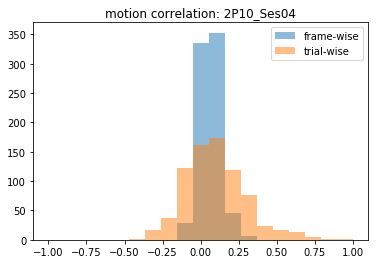

2P09_Ses05


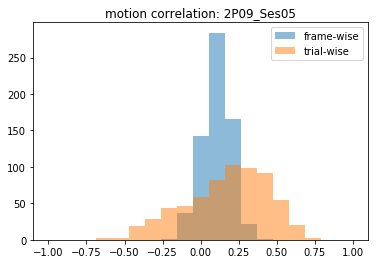

2P10_Ses05


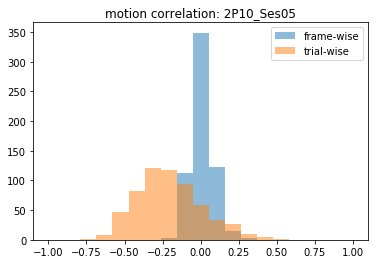

2P11_Ses06


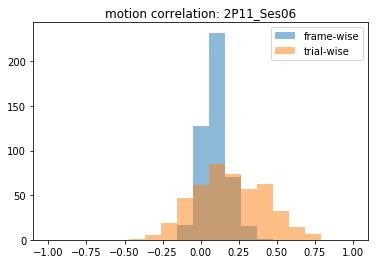

2P11_CFA


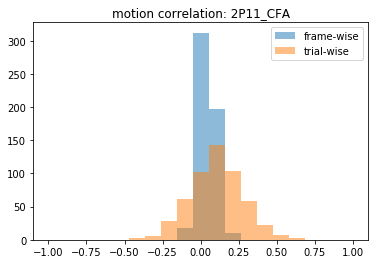

2P05_Ses03


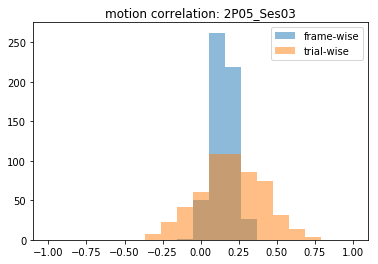

In [183]:
# To make histograms off the long-format data-frame
output_path = '/Volumes/Behaviour/Tailored 3sec 2P Trials/Motion Correlation Histograms'
bins = np.linspace(-1, 1, 20)

for s in session_names:
    print(s)
    df1 = pearsons[pearsons['cell_id'].str.contains(str(s))]
    df2 = pearson_ave[pearson_ave['cell_id'].str.contains(str(s))]
    plt.hist(df1['pearsons'], bins, alpha=0.5, label='frame-wise')
    plt.hist(df2['pearsons'], bins, alpha=0.5, label='trial-wise')
    plt.legend(loc='upper right')
    plt.title('motion correlation: '+s)
    plt.savefig(os.path.join(output_path, s+'_motion_correlation_distribution_05.png'))
    plt.show()